# 1、numpy——基本功能

### 标准的Python中用列表(list)保存一组值，可以用来当作数组使用。但由于列表的元素可以是任何对象，因此列表中保存的是对象的指针。这样的话，为了保存一个简单的列表，比如[1，2,3],需要三个指针和三个整数对象。对于数值运算来说，这种结构显然比较浪费内存和C P U 计算时间。此外，Python还提供了 array模块，它所提供的array对象和列表不同，能直接保存数值，但是由于它不支持多维数组，也没有各种运算函数，因此也不适合做数值运算。
### NumPy 的诞生弥补了这些不足，NumPy 提供了两种基本的对象：
#### (1)ndarry: 英文全称为 n-dimensional array object, 它是存储单一数据类型的多维数组，后面统称为数组
#### (2)ufunc: 英文全称为 universal function object,它是一种能够对数组进行处理的特殊函数

In [1]:
import numpy as np
print('numpy 版本：',np.__version__)

numpy 版本： 1.14.2


## 1.1 ndarray 对象

### NumPy中使用 ndarray 对象表示数组，它是整个库的核心对象，NumPy 中所有函数都是围绕 ndarry 对象进行处理的。ndarry 功能强大，不但可以用它①高效地存储打乱的数值元素，从而提高数组运算的速度，还可以用它②与各种扩展库进行数据交互

### 1.1.1 创建

#### 首先需要创建数组才能对其进行运算和操作。可以通过给array()函数传递Python的序列对象来创建数组，如果传递的是多层嵌套的序列，将创建多维数组(下例中的变量c)：

In [2]:
a = np.array([1,2,3,4])
b = np.array((5,6,7,8))
c = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])

In [3]:
print('a:',a)
print('b:',b)
print('c:\n',c)

a: [1 2 3 4]
b: [5 6 7 8]
c:
 [[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]]


#### 数组的形状可以通过其 shape 属性得到，它是一个描述数组个个轴的长度的元组(tuple)

In [4]:
print('a.shape:',a.shape)
print('b.shape:',b.shape)
print('c.shape:',c.shape)

a.shape: (4,)
b.shape: (4,)
c.shape: (3, 4)


#### 结果分析：数组a的 shape 属性只有一个元素，因此它是一维数组；而数组c的 shape 属性有两个元素，因此它是二维数组，其中第0轴的长度为3，第1轴的长度是4

#### 可通过修改数组的 shape 属性，在保持元素个数不变的情况下，改变数组每个轴的长度。ex:将数组c的 shape 属性改为 (4,3)，这里从(3,4)到(4,3)并不是对数组进行转置，而只是改变每个轴的大小，数组元素的位置在内存中的位置并没有发生改变

In [5]:
c.shape = (4,3)
c

array([[ 1,  2,  3],
       [ 4,  4,  5],
       [ 6,  7,  7],
       [ 8,  9, 10]])

#### 当设置数组某个轴的长度为 -1 时，将自动计算此轴的长度。ex:数组c有12个元素，因此下面的程序将数组c的shape改为(2,6)

In [6]:
c.shape = 2,-1   # c.shape的值可以是tuple(直接写 2,-1 默认是tuple)和list
c

array([[ 1,  2,  3,  4,  4,  5],
       [ 6,  7,  7,  8,  9, 10]])

#### 使用数组的 reshape() 方法，可以创建指定形状的新数组，而原数组不会发生任何改变(使用 c.shape = 2,6 时,并没有产生新的数字，而原始数组发生了改变)

In [7]:
d = a.reshape(2,2)  # 也可用 a.reshape((2,2))和a.reshape([2,2])
print('a:',a)
print('d:\n',d)

a: [1 2 3 4]
d:
 [[1 2]
 [3 4]]


#### 数组a和d其实共享数据存储空间，因此修改其中任意一个数组的元素都会同时修改另一个数组的内容。ex:修改a[1]=100,d中的第2个元素也会修改为100

In [8]:
a[1] = 100      # 将数组a的第2个元素改为100
print('a:',a,'\nd:\n',d)

a: [  1 100   3   4] 
d:
 [[  1 100]
 [  3   4]]


### 1.1.2 元素类型

#### 数组的元素类型可以通过 dtype 属性获得。在前而的例子中，创建数组所用的序列的元素都是整数，因此所创建的数组的元素类型是整型

In [9]:
c.dtype

dtype('int32')

#### 可以通过dtype参数在创建数组吋指定元素类型，注意 float类型是64位的双精度浮点类型，而 complex是 128位的双精度复数类型

In [10]:
ai32 = np.array([1,2,3,4],dtype=np.int32)
af = np.array([1,2,3,4],dtype=float)
ac = np.array([1,2,3,4],dtype=complex)

print('ai32.dtype:',ai32.dtype,'\naf.dtype:',
      af.dtype,'\nac.dtype:',ac.dtype)

ai32.dtype: int32 
af.dtype: float64 
ac.dtype: complex128


#### 上面的例子中，传速给dtype参数的都是类型(type)对象，其 中 float和 complex为 Python内置的浮点数类型和复数类型，而 np.int32是 NumPy定义的新的数椐类型一一32位符号整数类型。
#### NumPy也有自己的浮点数类型： floatl6、float32、 float64、floatl28。当使用float64作为 dtype 参数时，其效果和内置的float类型相N

#### NumPy中的每个数值类型都有几种字符串表示方式，字符串和类型之间的对应关系都存储在 typeDict 字典中。ex:查看NumPy中的所有数值类型

In [11]:
set(np.typeDict.values())     # 将typeDict字典中所有的值转换为一个集合，且去除其中的重复项

{numpy.bool_,
 numpy.bytes_,
 numpy.complex128,
 numpy.complex128,
 numpy.complex64,
 numpy.datetime64,
 numpy.float16,
 numpy.float32,
 numpy.float64,
 numpy.float64,
 numpy.int16,
 numpy.int32,
 numpy.int32,
 numpy.int64,
 numpy.int8,
 numpy.object_,
 numpy.str_,
 numpy.timedelta64,
 numpy.uint16,
 numpy.uint32,
 numpy.uint32,
 numpy.uint64,
 numpy.uint8,
 numpy.void}

#### 上面显示的数值类型与数组的dtype属性是不同的对象。通过dtype对象的type属性可以获得与其对应的数值类型

In [12]:
c.dtype.type

numpy.int32

#### 【注】：NumPy的数值对象的运算速度比Python的内置类型的运算速度慢许多

#### 使用 astype() 方法可以对数组的元素类型进行转换。ex:将浮点数数组t1转换为32位整型数组；将双精度的复数数组t2转换成单精度的复数数组

In [13]:
t1 = np.array([1,2,3,4],dtype=np.float)
t2 = np.array([1,2,3,4],dtype=np.complex)
t3 = t1.astype(np.int32)
t4 = t2.astype(np.complex64)

In [14]:
print(t1,t3)
print(t2,t4)

[1. 2. 3. 4.] [1 2 3 4]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j] [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


### 1.1.3 自动生成数组

#### 前面的例子，我们都是先创建一个Python的序列对象，然后通过array()将其转为数组，效率显然不高。NumPy 中提供了许多专门用于创建数组的函数。

#### (1) arange()类似于内置函数range()，通过指定开始值、终止值和步长来创建表示等差数列的一维数组，但所得的数组中并不包含终止值。ex：创建开始值为0、终止值为1、步长为0.1的等差数组（终止值1不在其中）

In [15]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#### np.arange() 返回的是一个数组，参数可以是浮点数；range()返回的是迭代器，且它的参数必须是整数

#### (2) linspace()通过指定开始值、终止值和元素个数来创建表示等差数列的一维数组，可通过endpoint参数指定是否包含终止值，默认是True——包含终止值。ex:演示endpoint值为True和False

In [16]:
np.linspace(0,1,10)               # endpoint=True

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [17]:
np.linspace(0,1,10,endpoint=False) # endpoint=False

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#### logspace()和linspace()类似，它创建的数组是等比数列。ex:产生从$10^0到10^2$、有5个元素的等比数列，起始值0表示$10^0$，而终止值2表示$10^2$

In [18]:
np.logspace(0,2,5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

#### logspace()基数默认是10，可通过base参数指定。ex:将基数设置为2，并设置endpoint=False,创建一个比例为$2^{1/12}$的等比数列

In [19]:
np.logspace(0,1,12,base=2,endpoint=False)

array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863])

#### zeros(), ones(), empty()可以创建指定形状和类型的数组。empty()只分配数组所使用的内存，不对数组元素进行初始化操作。ex:

In [20]:
np.empty((2,3),np.int)

array([[      0,       0, 2097253],
       [6357072, 6815860,       0]])

#### zeros()将数组元素初始化为0；ones()将数组元素初始化为1.ex:

In [21]:
np.zeros(4,np.int)

array([0, 0, 0, 0])

In [22]:
np.ones((2,2),np.float)

array([[1., 1.],
       [1., 1.]])

#### full()将数组元素初始化为指定的值。ex:

In [23]:
np.full((2,3),np.pi)

array([[3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265]])

#### 此外,zeros_like(), ones_like(),empty_like(),full_like()等函数创建与参数数组的形状和类型相同的数组，因此zeros_like(a)和zeros(a.shape, a.dtype)效果是相同的。ex:

In [24]:
print(np.zeros_like(a))
print(np.zeros(a.shape,a.dtype))

[0 0 0 0]
[0 0 0 0]


### 1.1.4 存取元素

#### 可以使用和列表相同的方式对数组的元素进行存取

In [25]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### •a[5]: 用整数作为下标可以获取数组中的某个元素。
#### •a[3:5]: 用切片作为下标获取数组的一部分，包 拈 a[3]但不包括a[5]。
#### •a[:5]:切片中省略开始下标，表示从a[0]开始。
#### •a[:-l ]: 下标可以使用负数，表示从数组最后往前数
#### •a[1:-l:2]:切片中的第三个参数表示步长，2 表示隔一个元素取一个元素。
#### • a[::-1]:省略切片的开始下标和结束下标，步长为- 1 , 整个数组头尾颠倒。
#### • a[5:l:-2]: 步长为负数时，开始下标必须大于结束下标
#### 下标还可以用来修改元素的值。ex：

In [26]:
a[2:4] = 100,101   # a[2]=100,a[3]=101
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

#### 和列表不同的是，通过切片获取的新的数组是原始数组的一个视b阁。它与原始数组共享同一块数椐存储空间。下而的程序将b 的第2个元素修改为-10, a 的第5 个元素也同时被修改为-10，因为它们在内存中的地址相同

In [27]:
b = a[3:7]   # 通过切片产生一个新的数组b，b和a共享同一块数据存储空间
b[2] = -10

print(b,'\n',a)

[101   4 -10   6] 
 [  0   1 100 101   4 -10   6   7   8   9]


#### 除了使用切片下标存取元素之外，NumPy还提供了整数列表、整数数组和布尔数组等几种高级下标存取方法。当使用整数列表对数组元素进行存取时，将使用列表中的每个元素作为下标。使用列表作为下标得到的数组不和原始数组共享数据

In [28]:
x = np.arange(10,1,-1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [29]:
a = x[[3,3,1,8]]  # 获取x中下标为3、3、1、8的四个元组，组成一个新的数组
a

array([7, 7, 9, 2])

In [30]:
b = x[[3,3,-3,8]]   # 下标可以是负数，-3表示取倒数第3个元素
b

array([7, 7, 4, 2])

In [31]:
b[2] = 100   # 由于b和x不共享内存，因此x的值不变
print(b,'\n',x)

[  7   7 100   2] 
 [10  9  8  7  6  5  4  3  2]


#### 整数序列下标也可用来修改元素的值

#### 当使用整数数组作为数组下标时，将得到一个形状和下标数组相同的新数组，新数组的每个元素都是用下标数组中对应位置的值作为下标从原数组获得的值。当下标数组是一维数组时，结果和用列表作为下标的结果相同；当下标是多维数组时，得到的也是多维数组。

In [32]:
x = np.arange(10,1,-1)
x[np.array([3,3,1,8])]

array([7, 7, 9, 2])

#### 还有多维数组、结构数组、内存结构等内容待学习

## 1.2 ufunc 函数

### ufunc 是 universal function 的缩写，它是一种能对数组的每个元素进行运算的函数。

### 1.2.1 四则运算

### 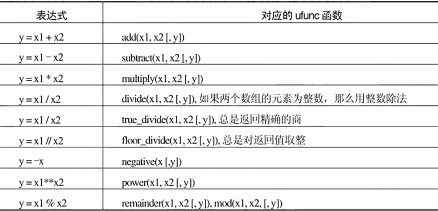

### 1.2.2 比较运算和布尔运算

### 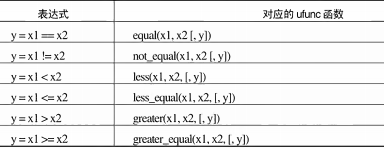

## 1.3 庞大的函数库

### 1.3.1 随机数

### 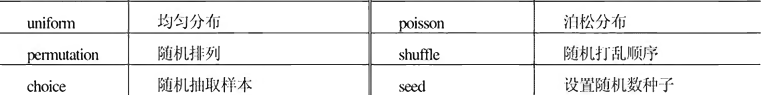
### 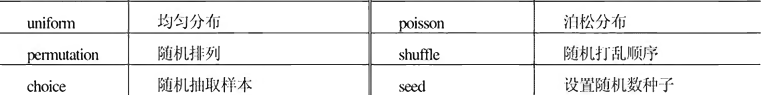

### 1.3.2 求和、平均值和方差

### 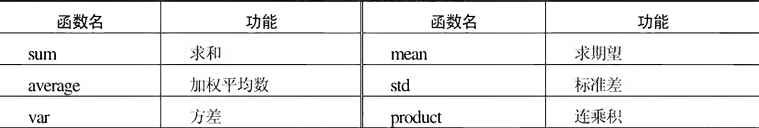

### 1.3.3 大小和排序

### 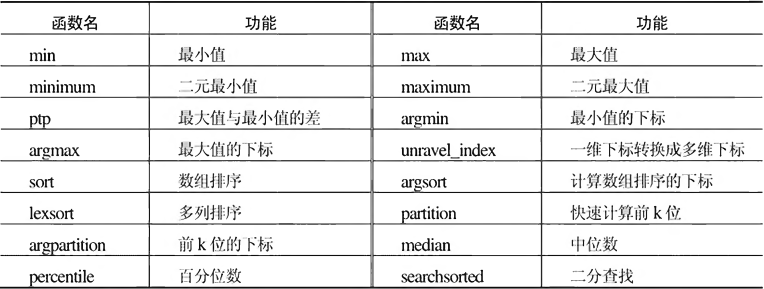

### 1.3.4 统计函数

### 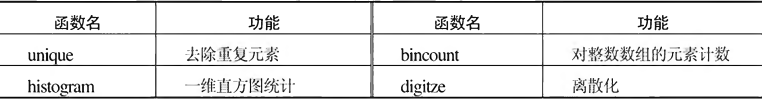

### 1.3.5 分段函数 

### 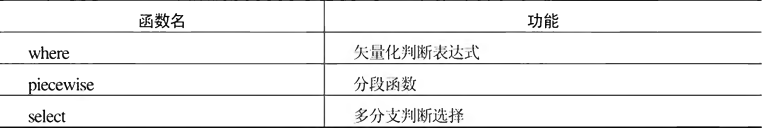

### 1.3.6 操作多维数据

### 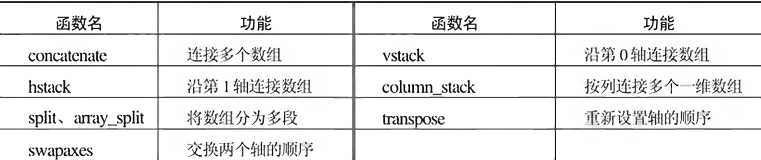

# 2、pandas——基本功能

## NumPy虽然提供了方便的数组处理功能，但是缺少数据处理、分析所需的许多快速工具。Pandas基于NumPy开发，提供了众多更高级的数据处理功能

## 2.1 Series对象

### Series是一种类似于一维数组的对象，它由一组数据(各种NumPy数据类型)以及一组与之相关的数据标签(即索引)组成。

### Series 的字符串表现形式为：索引在左，值在右边。若我们没有为数据指定索引，于是会自动创建一个0到N-1(N为数据的长度)的整数型索引。可以通过Series的values和index的属性获取其数组表示形式和索引对象

In [33]:
import pandas as pd
from pandas import Series, DataFrame

In [34]:
obj = Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

### 通常，我们希望所创建的Series带有一个可以对各个数据点进行标记的索引：

In [35]:
obj2 = Series([4,7,-5,3],index=['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

### 同普通的NumPy数组相比，可通过索引的方式选择Series中的单一或一组值：

In [36]:
obj2['a']

-5

In [37]:
obj2['d'] = 6
obj2[['c','a','d']]

c    3
a   -5
d    6
dtype: int64

### NumPy数组运算(如根据布尔型数组进行过滤、标量乘法、应用数学函数等)会保留索引和值之间的链接：

In [38]:
obj2>0

d     True
b     True
a    False
c     True
dtype: bool

In [39]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

### 还可将Series看成是一个定长的有序字典，因为它是索引值到数据值得一个映射。它可以用在许多原本需要字典参数的函数中：

In [40]:
'b' in obj2

True

In [41]:
'e' in obj2

False

### 如果数据被存在一个Python字典中，也可以直接通过这个字典来创建Series

In [42]:
# 如果只传入一个字典，则结果Series中的索引就是原字典的键(有序排列)
sdata = {'Ohio':35000,'Texas':7100,'Oregon':16000,'Utanh':5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas      7100
Utanh      5000
dtype: int64

In [43]:
states = ['California','Ohio','Oregon','Texas']
obj4 = Series(sdata,index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas          7100.0
dtype: float64

### 在上述例子中，sdata 中跟 states 索引匹配的那3个值会被找出来并放到相应的位置上，由于'California'所对应的sdata值找不到，所以其结果就为NaN(在pandas中表示缺失值).pandas中的isnull和notnull函数可用来检测缺失值

In [44]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [45]:
# Series也有类似的实例方法
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

### Series对象本身及其索引都有一个叫name的属性，该属性和pandas其他的关键功能关系非常密切：

In [46]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas          7100.0
dtype: float64

In [47]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas          7100.0
Name: population, dtype: float64

### Series的索引可通过赋值的方式就地修改。ex:

In [48]:
obj4.index = ['Bob','Steve','Jeff','Ryan']
obj4

Bob          NaN
Steve    35000.0
Jeff     16000.0
Ryan      7100.0
Name: population, dtype: float64

## 2.2 DataFrame

### DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列的值可以是不同的数据类型(数值、字符串、布尔值等)。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典(共用同一个索引)

### 2.2.1 创建

#### (1) 构建DataFrame的方法很多，最常用的一种是：直接传入一个由等长列表或NumPy数组组成的字典。ex:

In [49]:
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002],
       'pop':[1.5,1.7,3.6,2.4,2.9]}
frame = DataFrame(data)

In [50]:
# DataFrame会自动加上索引(和Series一样)，且全部列会被有序排列
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


#### 除了指定了列序列，则DataFrame的列就会按照指定顺序进行排列

In [51]:
DataFrame(data,columns=('year','state','pop'))  # columns 参数可设为tuple或list

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


#### 和Series一样，如果传入的列在数据中找不到，就会产生NA值

In [52]:
frame2 = DataFrame(data,columns=['year','state','pop','debt'],
                  index=['one','two','three','four','five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


#### 通过类似字典标记的方法或属性的方式，可以将DataFrame的列表获取为一个Series，返回的Series拥有原DataFrame相同的索引，且其name属性也已经被相应地设置好了；行也可以通过位置或名称的方式进行获取(比如用索引字段loc—通过行名获取数据,iloc—通过行的位置获取数据)

In [53]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [54]:
frame2['year']

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [55]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

#### 列可以通过赋值的方式进行修改。ex:给空的'debt'列赋上一个标量或一组值

In [56]:
frame2.debt = 16.5   # or frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [57]:
frame2['debt'] = np.arange(5.0)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


#### 将列表或数组赋值给某个列时，其长度必须和DataFrame的长度相匹配。如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失值：

In [58]:
va1 = Series([-1.2,-1.5,-1.7],index = ['two','four','five'])
frame2.debt = va1
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


#### (2) 另一种常见的数据形式是嵌套字典(也就是字典的字典)
#### 如果它传给DataFrame，它会解释为：外层字典的键作为列，内层的键作为行

In [59]:
pop = {'Nevada':{2001:2.4,2002:2.9},
      'Ohio':{2000:1.5,2001:1.7,2002:3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


#### 可对DataFrame对象进行转置

In [60]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


#### 可以注入给DataFrame构造器的数据
#### 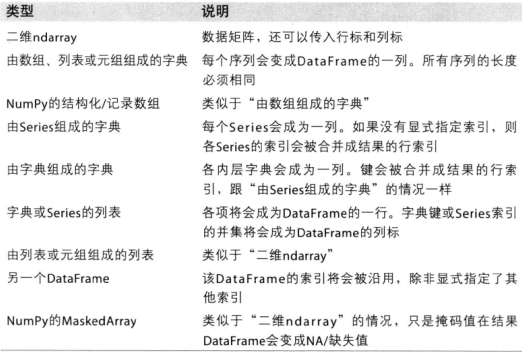